#### Часть 1. EDA и Preprocessing.
Скачайте данные по клиентам немецкого банка: https://www.kaggle.com/uciml/german-credit;<br>
Проведите EDA, чтобы познакомиться с признаками;<br>
Преобразуйте все признаки в числовые подходящими методами;<br>
Приведите все данные к одному масштабу (а заодно поясните, почему это необходимая операция при кластеризации).<br>

In [6]:
!curl -L -o ./german-credit.zip https://www.kaggle.com/api/v1/datasets/download/uciml/german-credit -s
!tar -xf german-credit.zip

In [3]:
import pandas as pd
data=pd.read_csv('./german_credit_data.csv')
print("\x1b[31m--========== HEAD ==========--\x1b[0m")
print(data.head())
print("\x1b[31m--========== Data type ==========--\x1b[0m")
print(data.info())
print("\x1b[31m--========== Null data ==========--\x1b[0m")
print(data.isnull().sum() )

--========== HEAD ==========--
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  
--========== Data type ==========--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            -

Преобразование всех признаков в числовые

In [4]:
from sklearn.preprocessing import LabelEncoder
import json
labeled_data=['Sex','Saving accounts','Checking account','Purpose','Housing']
from pprint import pprint
le = LabelEncoder()
data.drop(columns=['Unnamed: 0'], inplace=True)
data.fillna('zero',inplace=True)
unique_labels=dict()
p=None
for col_name in labeled_data:
    unique_labels[col_name]=[p for p in data[col_name].unique()]
    le = LabelEncoder()
    le.fit(unique_labels[col_name])
    data[col_name+"_f"]=le.transform(data[col_name])    
pprint(unique_labels)
data_with_labels=data[labeled_data]
data.drop(columns=labeled_data, inplace=True)
data.head()


{'Checking account': ['little', 'moderate', 'zero', 'rich'],
 'Housing': ['own', 'free', 'rent'],
 'Purpose': ['radio/TV',
             'education',
             'furniture/equipment',
             'car',
             'business',
             'domestic appliances',
             'repairs',
             'vacation/others'],
 'Saving accounts': ['zero', 'little', 'quite rich', 'rich', 'moderate'],
 'Sex': ['male', 'female']}


,Age,Job,Credit amount,Duration,Sex_f,Saving accounts_f,Checking account_f,Purpose_f,Housing_f
0,67,2,1169,6,1,4,0,5,1
1,22,2,5951,48,0,0,1,5,1
2,49,1,2096,12,1,0,3,3,1
3,45,2,7882,42,1,0,0,4,0
4,53,2,4870,24,1,0,0,1,0


<Axes: >

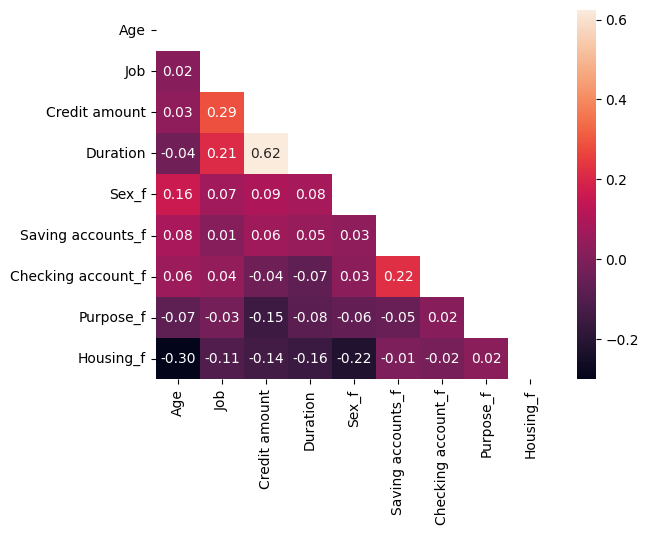

In [5]:
from seaborn import heatmap, pairplot
import numpy as np
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap(corr, mask=mask, annot=True, fmt='.2f')


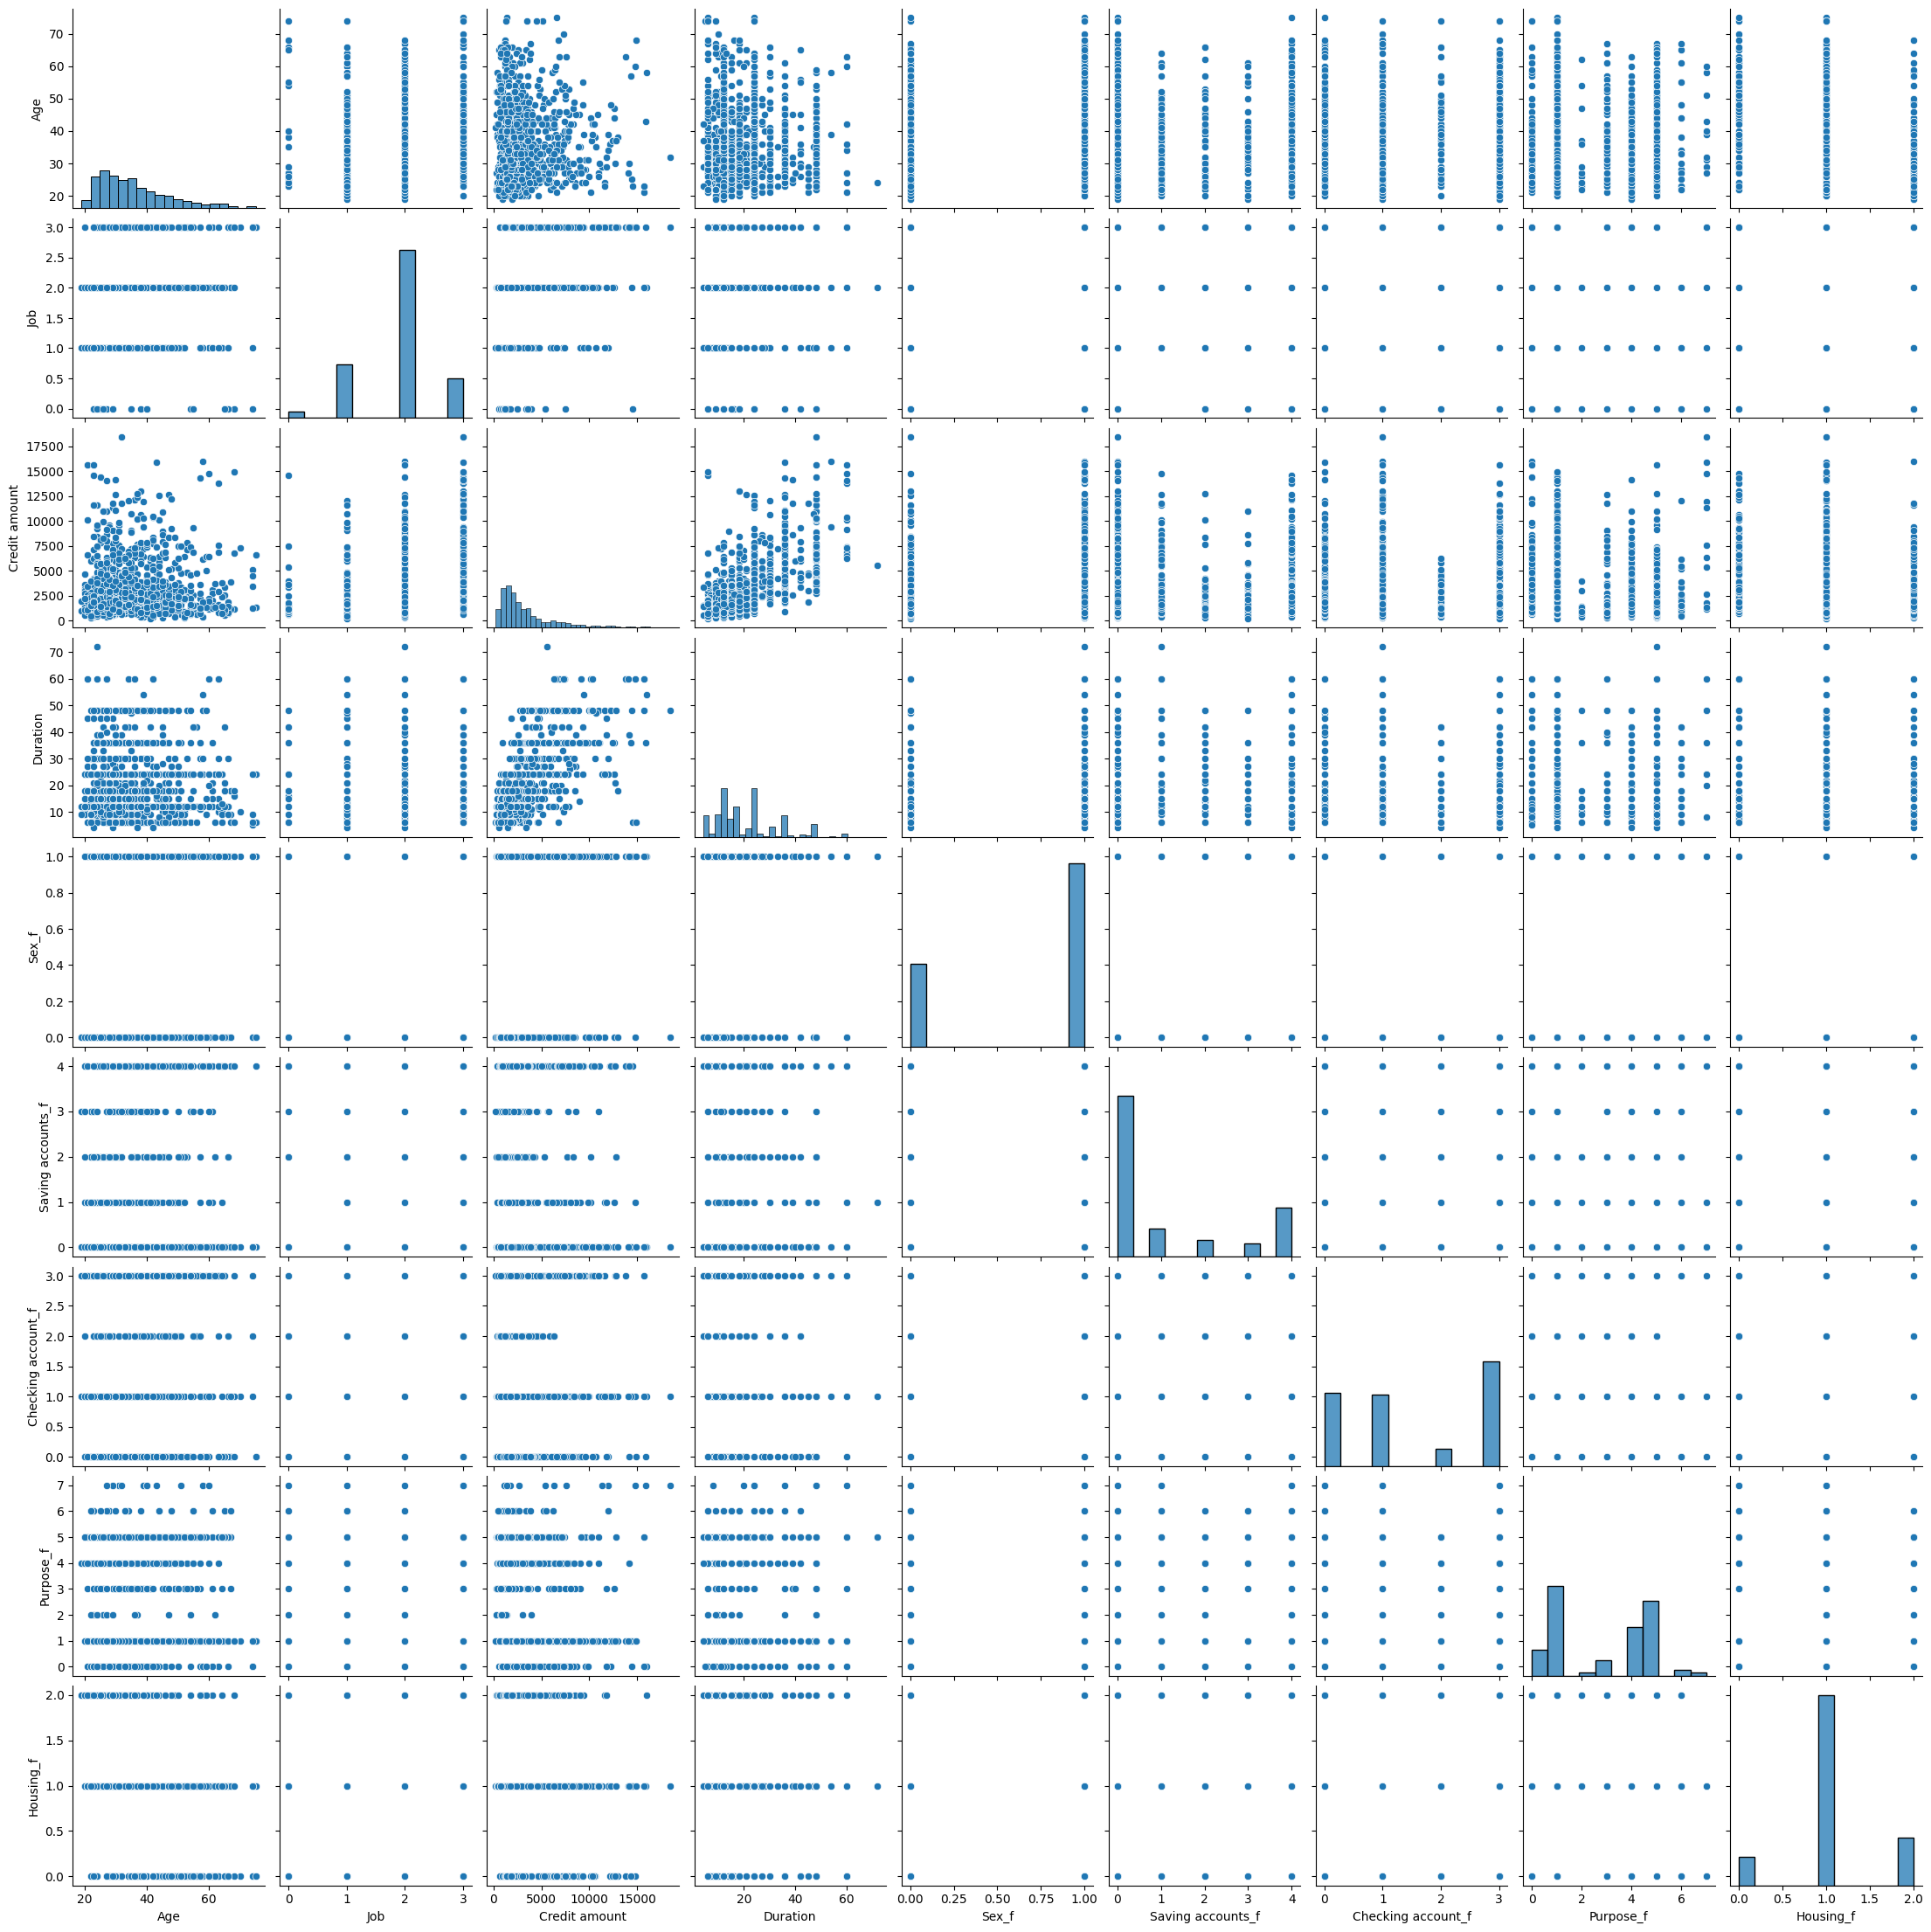

In [6]:
pairplot(data)

In [7]:
print(data.describe())


               Age          Job  Credit amount     Duration        Sex_f  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000   
mean     35.546000     1.904000    3271.258000    20.903000     0.690000   
std      11.375469     0.653614    2822.736876    12.058814     0.462725   
min      19.000000     0.000000     250.000000     4.000000     0.000000   
25%      27.000000     2.000000    1365.500000    12.000000     0.000000   
50%      33.000000     2.000000    2319.500000    18.000000     1.000000   
75%      42.000000     2.000000    3972.250000    24.000000     1.000000   
max      75.000000     3.000000   18424.000000    72.000000     1.000000   

       Saving accounts_f  Checking account_f    Purpose_f    Housing_f  
count        1000.000000         1000.000000  1000.000000  1000.000000  
mean            1.105000            1.577000     2.878000     1.071000  
std             1.580023            1.257638     1.978138     0.531264  
min             0.00000

<Axes: >

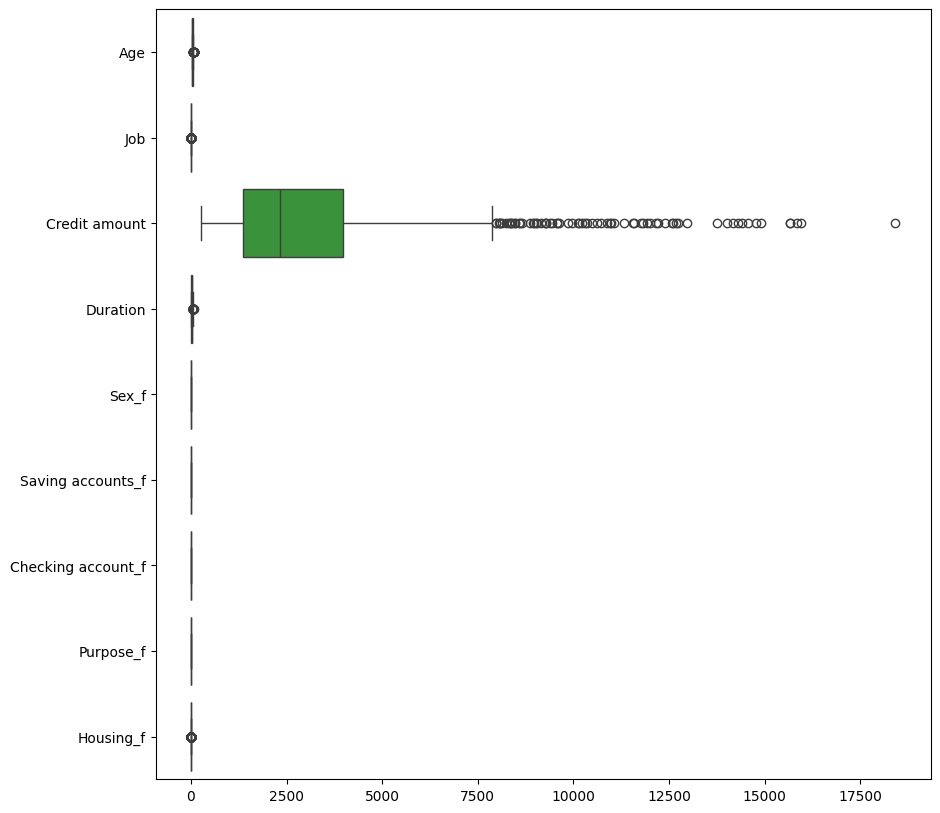

In [8]:
from seaborn import boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
boxplot(data=data, orient='h')

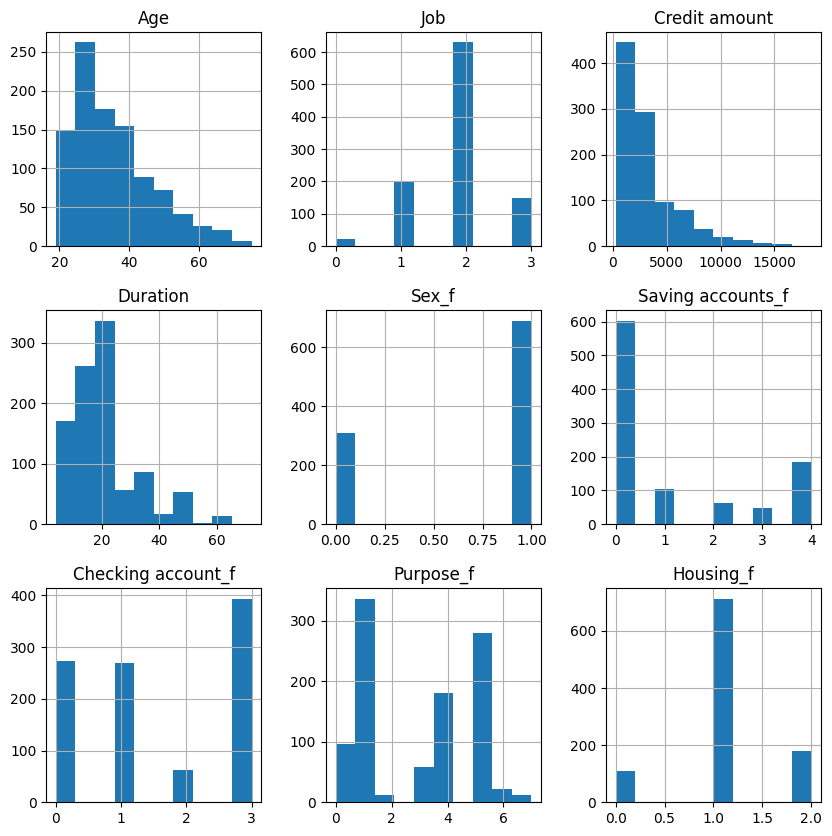

In [9]:
data.hist(figsize=(10,10));

Алгоритмы кластеризации используют расстояния между точками. Большая разница между граничными значениями столбцов
с данными приведет к доминированию одних признаков по отношению к другим. Приведем данные к одному масштабу.

               Age          Job  Credit amount     Duration        Sex_f  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000   
mean      0.295464     0.634667       0.166241     0.248574     0.690000   
std       0.203133     0.217871       0.155317     0.177336     0.462725   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.142857     0.666667       0.061379     0.117647     0.000000   
50%       0.250000     0.666667       0.113871     0.205882     1.000000   
75%       0.410714     0.666667       0.204812     0.294118     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

       Saving accounts_f  Checking account_f    Purpose_f    Housing_f  
count        1000.000000         1000.000000  1000.000000  1000.000000  
mean            0.276250            0.525667     0.411143     0.535500  
std             0.395006            0.419213     0.282591     0.265632  
min             0.00000

<Axes: >

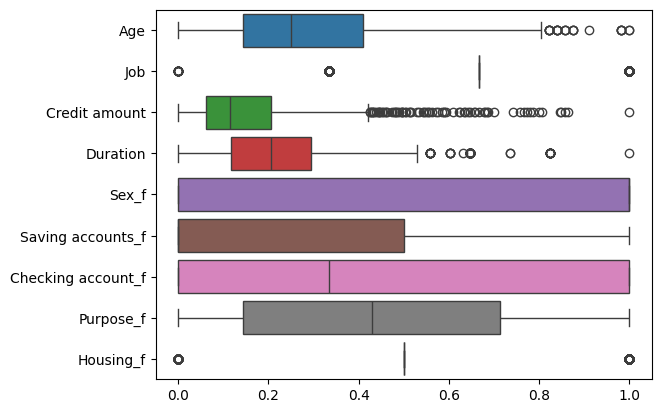

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
print(data_scaled.describe())
boxplot(data=data_scaled, orient='h')

#### Часть 2. Моделирование.
Постройте три варианта кластеризации: k-means, hierarhical и DBSCAN, подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot;<br>
Также воспользуйтесь различными вариантами сжатия признакового пространства (PCA, UMAP, tSNE) и визуализируйте результаты кластеризации на двумерной плоскости.<br>

#### Снижение размерности для визуализации

In [30]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

fit = umap.UMAP()

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10)


# PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=10)
data_tsne = tsne.fit_transform(X_scaled)

# UMAP
umap_reducer = umap.UMAP(random_state=10)
data_umap = umap_reducer.fit_transform(X_scaled)

C:\Python312\py312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Python312\py312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [190]:
from seaborn import scatterplot
def visualize(labels=None,marker=""):
    fig, axs = plt.subplots(1,3,figsize=(16,5))
    plt.subplot(131)
    scatterplot(x=data_tsne[:,0], y=data_tsne[:,1],hue=labels,palette="rainbow")
    plt.title('TSNE '+marker)
    plt.subplot(132)
    scatterplot(x=data_umap[:,0], y=data_umap[:,1],hue=labels,palette="rainbow")
    plt.title('UMAP '+marker)
    plt.subplot(133)
    scatterplot(x=data_pca[:,0], y=data_pca[:,1],hue=labels,palette="rainbow")
    plt.title('PCA '+marker)

C:\Users\pc\AppData\Local\Temp\ipykernel_18692\3598413668.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatterplot(x=data_tsne[:,0], y=data_tsne[:,1],hue=labels,palette="rainbow")
C:\Users\pc\AppData\Local\Temp\ipykernel_18692\3598413668.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatterplot(x=data_umap[:,0], y=data_umap[:,1],hue=labels,palette="rainbow")
C:\Users\pc\AppData\Local\Temp\ipykernel_18692\3598413668.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatterplot(x=data_pca[:,0], y=data_pca[:,1],hue=labels,palette="rainbow")


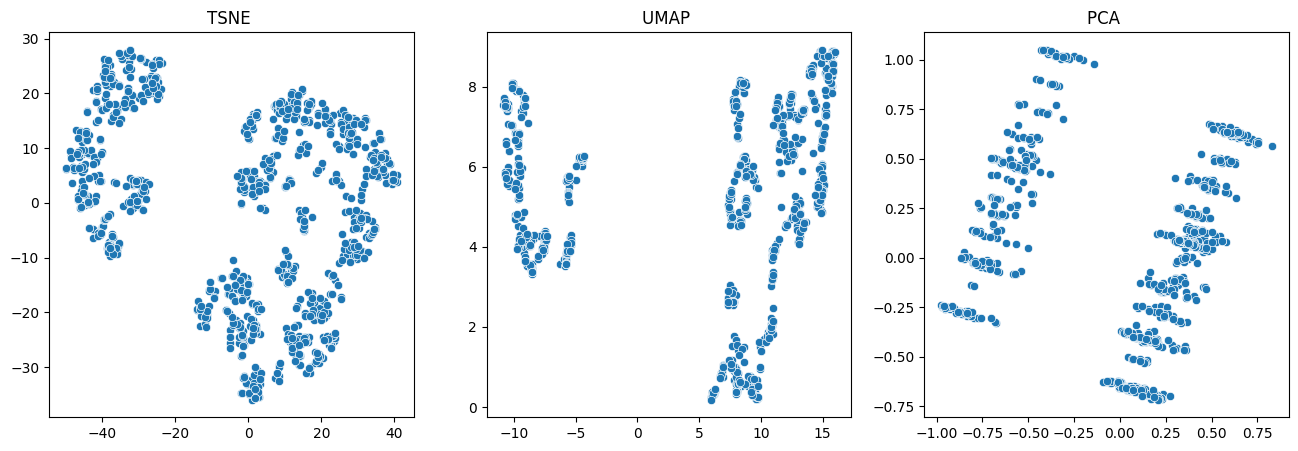

In [191]:
visualize()

In [108]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
def plot_elbow_and_silhouette(data, max_clusters=10):
    """Визуализация Elbow method и Silhouette score."""
    inertia = []
    sil_scores = []
    
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        inertia.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(data, labels))
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(range(2, max_clusters+1), inertia, marker='o')
    ax[0].set_title('Elbow Method')
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('Inertia')
    
    ax[1].plot(range(2, max_clusters+1), sil_scores, marker='o')
    ax[1].set_title('Silhouette Scores')
    ax[1].set_xlabel('Number of clusters')
    plt.show()

def evaluate_dbscan(data, eps_values, min_samples=5):
    """Подбор параметров для DBSCAN."""
    sil_scores = []
    n_clusters = []
    
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        unique_labels = np.unique(labels)
        n_clusters_ = len(unique_labels) - (1 if -1 in unique_labels else 0)
        n_clusters.append(n_clusters_)
        
        if len(unique_labels) < 2:
            sil_scores.append(-1)
        else:
            sample_indices = labels != -1
            if sum(sample_indices) > 1:
                sil_scores.append(silhouette_score(data[sample_indices], labels[sample_indices]))
            else:
                sil_scores.append(-1)
    
    plt.plot(eps_values, sil_scores, marker='o')
    plt.xlabel('Eps')
    plt.ylabel('Silhouette Score')
    plt.title('DBSCAN: Silhouette Score vs Eps')
    plt.show()

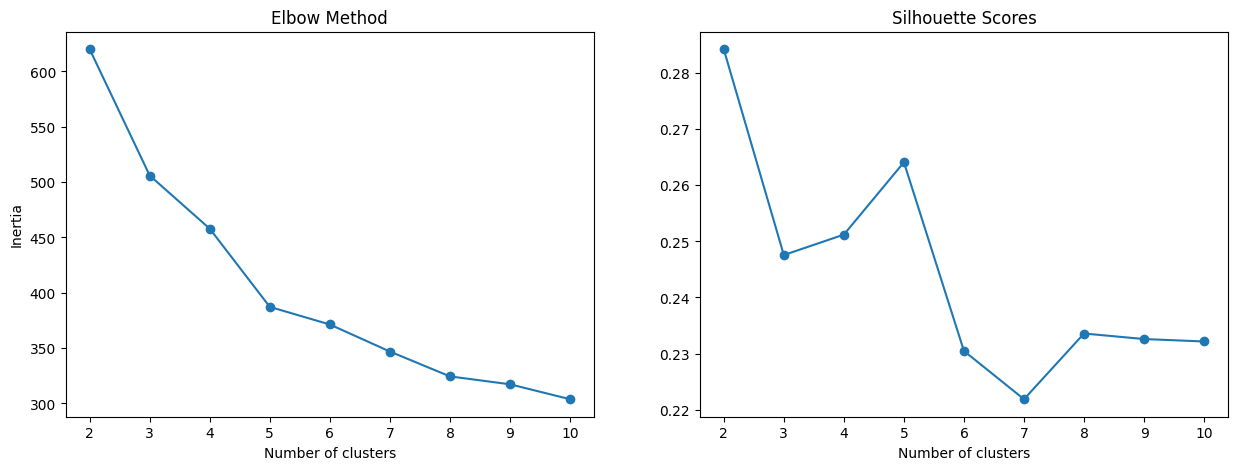

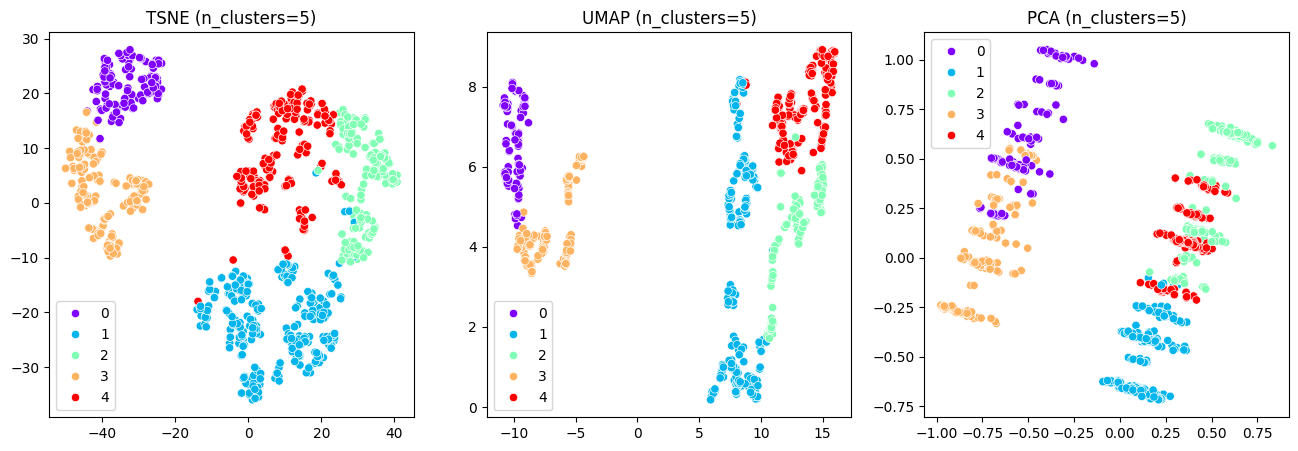

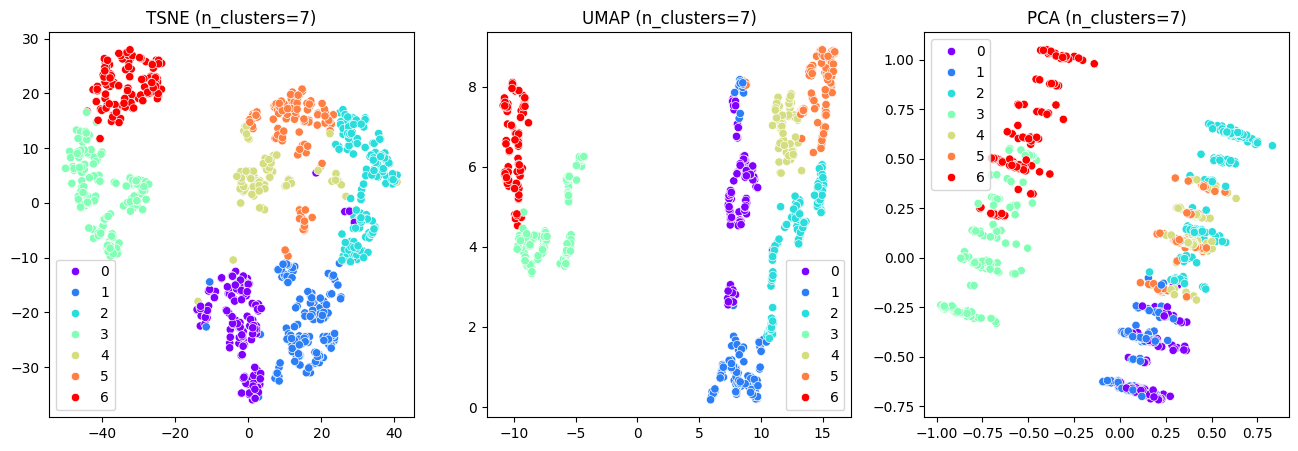

In [192]:
plot_elbow_and_silhouette(data_scaled, max_clusters=10)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
visualize(kmeans_labels,"(n_clusters=5)")
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
visualize(kmeans_labels,"(n_clusters=7)")

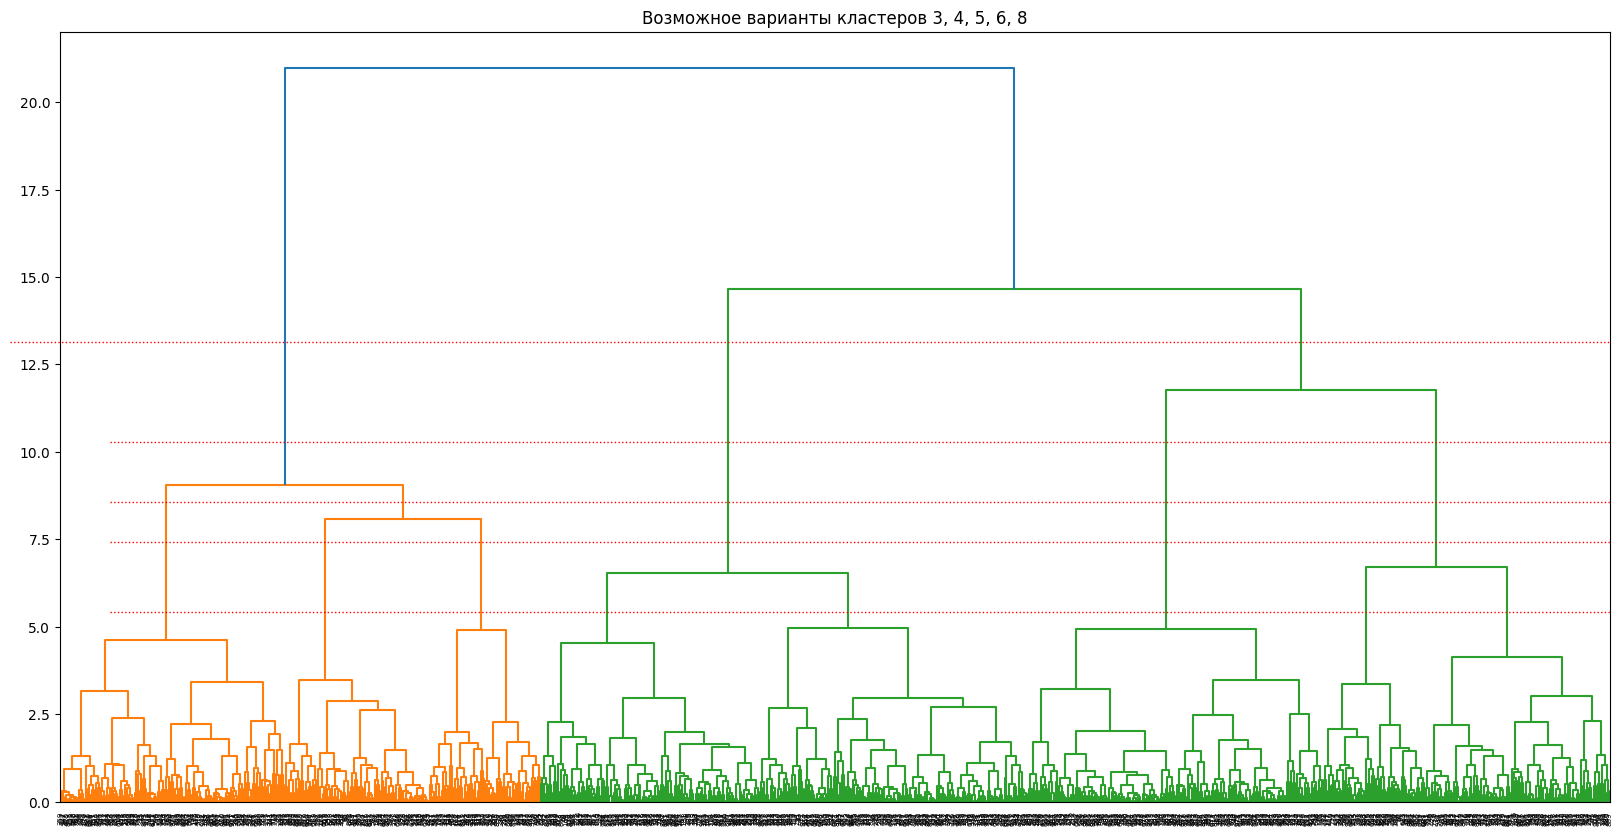

In [234]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.lines as lines
f=plt.figure(figsize=(20,10))
f.add_artist(lines.Line2D([0.1, 0.9], [0.57, 0.57], linewidth=1,color="red",linestyle="dotted"))
f.add_artist(lines.Line2D([0.15, 0.9], [0.47, 0.47], linewidth=1,color="red",linestyle="dotted"))
f.add_artist(lines.Line2D([0.15, 0.9], [0.37, 0.37], linewidth=1,color="red",linestyle="dotted"))
f.add_artist(lines.Line2D([0.15, 0.9], [0.3, 0.3], linewidth=1,color="red",linestyle="dotted"))
f.add_artist(lines.Line2D([0.15, 0.9], [0.41, 0.41], linewidth=1,color="red",linestyle="dotted"))
plt.title("Возможное варианты кластеров 3, 4, 5, 6, 8")
linkage_ = linkage(data_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)


In [123]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [184]:
x_tnse = data_tsne[:, 0]
y_tnse = data_tsne[:, 1]
print(x_tnse.max(),x_tnse.min())
print(y_tnse.max(),y_tnse.min())

x_umap = data_umap[:, 0]
y_umap = data_umap[:, 1]
print(x_umap.max(),x_umap.min())
print(y_umap.max(),y_umap.min())

x_pca = data_pca[:, 0]
y_pca = data_pca[:, 1]
print(x_umap.max(),x_umap.min())
print(y_umap.max(),y_umap.min())

40.749775 -49.958076
27.96844 -35.953014
15.988481 -10.886191
8.917145 0.1821461
15.988481 -10.886191
8.917145 0.1821461


746
1204


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.08it/s]


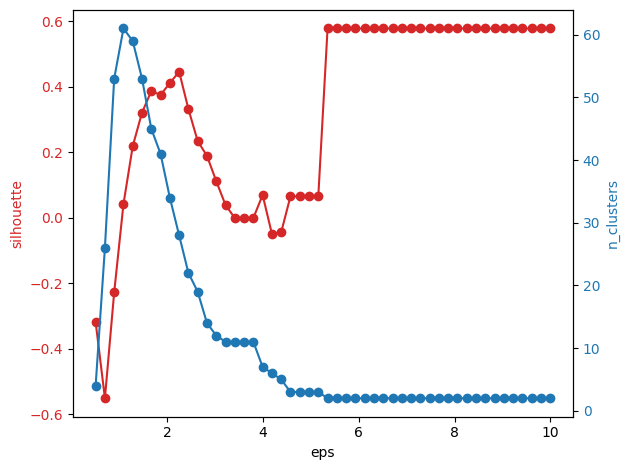

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.32it/s]


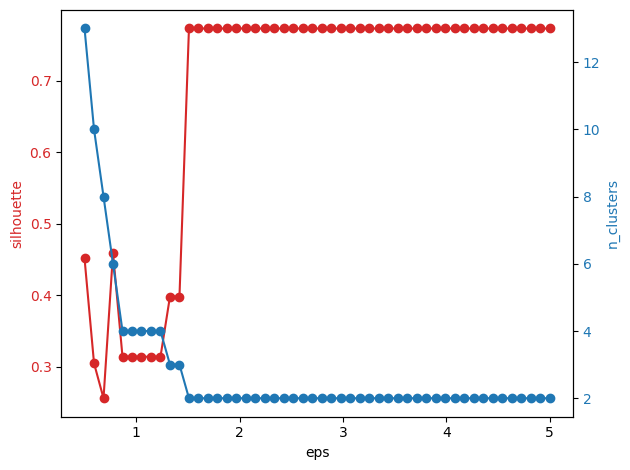

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 59.67it/s]


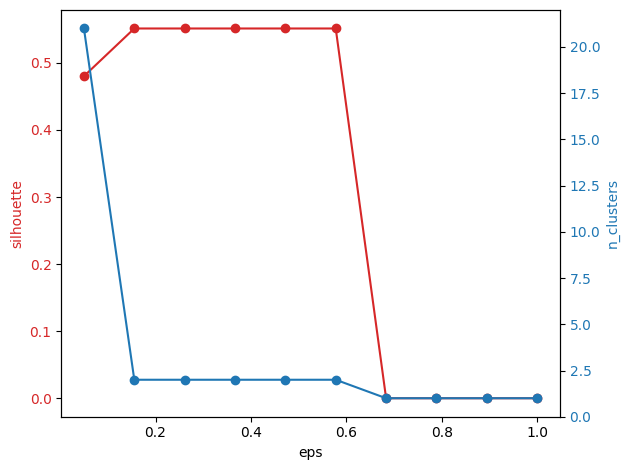

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 22.78it/s]


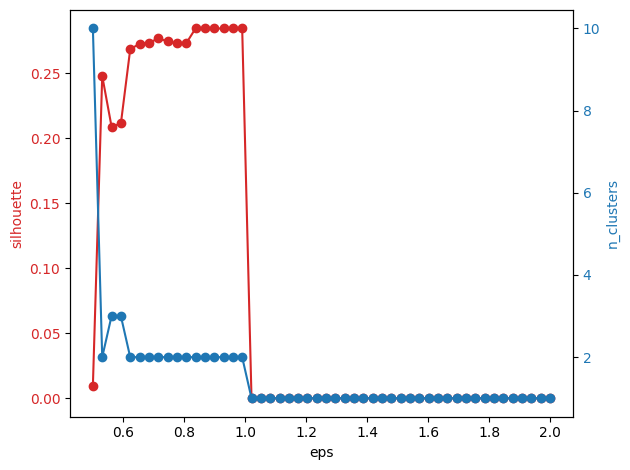

In [189]:
print(data_tsne.argmax())
print(data_tsne.argmin())
eps_values = np.linspace(0.5, 10, 50)
dbscan_clustering(eps_values,data_tsne)
eps_values = np.linspace(0.5, 5, 50)
dbscan_clustering(eps_values,data_umap)
eps_values = np.linspace(0.05, 1, 10)
dbscan_clustering(eps_values,data_pca)
eps_values = np.linspace(0.5, 2, 50)
dbscan_clustering(eps_values,data_scaled)

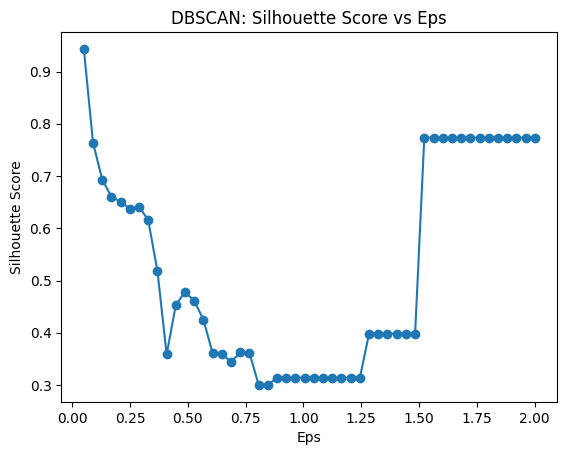

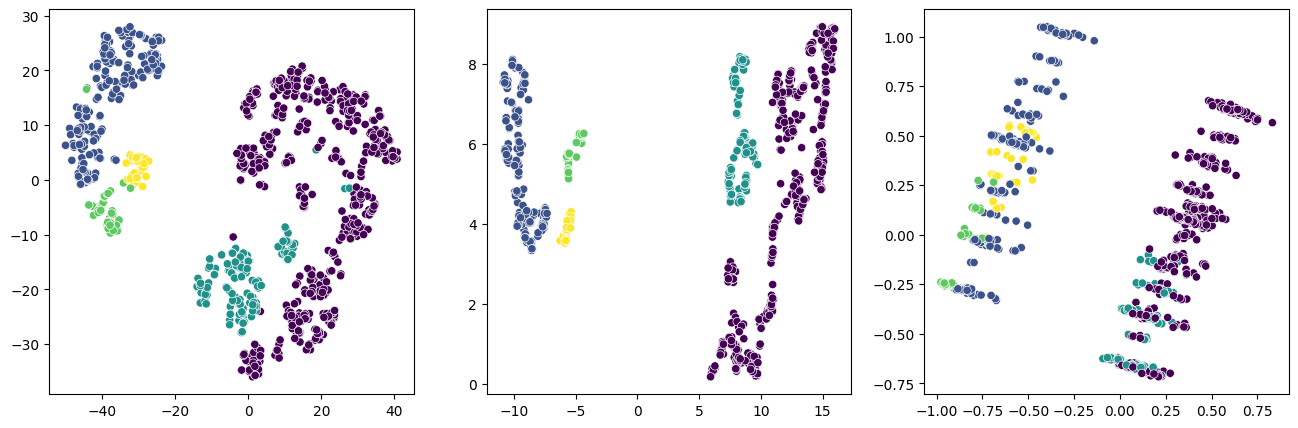

In [159]:
eps_values = np.linspace(0.05, 2, 50)
evaluate_dbscan(data_umap, eps_values)
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_umap)
visualize(dbscan_labels)

In [113]:
from tqdm import tqdm
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 34.37it/s]


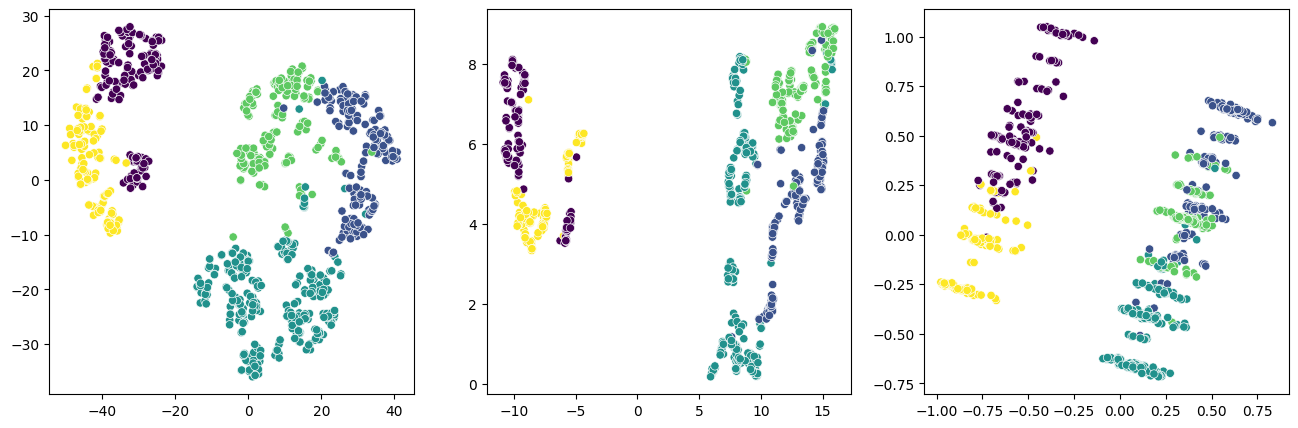

In [143]:
agg = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = agg.fit_predict(data_scaled)
visualize(hierarchical_labels)

#### Часть 3. Интерпретация.
Теперь ваша задача - попытаться проинтерпретировать получившиеся кластеры, начните с простого расчета средних значений признаков для каждого из кластеров, есть ли интересные закономерности?<br>
Теперь постройте boxplot-ы для каждого признака, сгруппировав значения по кластерам, по каким признакам заметно наибольшее отличие кластеров друг от друга? Можно ли их интерпретировать?<br>